# <center><font color='Black' face='comic sans ms'>Name:Nikhil Shetty</font></center>
# <font color='Black' face='comic sans ms'>Corse Code:DST10923</font>

# <center><font color='Blac' face='comic sans ms'>Movie Recomandation System</font></center>

<b>Problem on Hand: </b>This data set contain  of 10k top-rated TMDB movies till 26-July-2022. Our aim is Recomandate the movies by different appproch. </b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis
4. Model Building


In [ ]:
# Import Libraries for Analysis
import pandas as pd
import numpy as np


# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='yellow' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [ ]:
# Import the data set
movie_dataset=pd.read_csv('top10K-TMDB-movies.csv')

# Print top 5 rows of dataset
movie_dataset.head(5)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


## <font color='yellow' face='Cursive'> Data Cleaning and Preparation</font>

In [ ]:
# Check the info of data set
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


- <font>There are 10000 rows in the data set</font>
- <font >There are 9 columns in the data set provided</font>
- <font > All the columns are of Object,Int,Float type .</font>

In [ ]:
# Create a copy of data set
movie_cpy =movie_dataset.copy()

In [ ]:
# Check column names
movie_cpy.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Remove leading and trailing edges
movie_cpy.columns = movie_cpy.columns.str.strip()

# print coloumns after stripping spaces
print("Removing leading and trailing spaces: ",  movie_cpy.columns)

Removing leading and trailing spaces:  Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Check Null Values in data set
movie_cpy.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

<font color = 'Blue'> Null values are in  Genre and Overview Columns which are very less Number.</font>
<br>
<font color = 'Brown'>We are remove the null value.</font>

In [ ]:
#Droping the null value
movie_cpy=movie_cpy.dropna()

#Counting the unique value of some column.

In [ ]:
#Taking the unique value
print("Language type:",len(movie_cpy['original_language'].unique()))
movie_cpy['original_language'].value_counts()

Language type: 43


en    7809
fr     676
it     424
ja     275
es     195
de     104
ko      76
cn      54
zh      54
ru      47
pt      43
hi      39
sv      36
da      29
no      18
pl      16
nl      12
tr      11
th      10
fa       8
hu       6
id       6
fi       4
el       4
is       3
sr       3
cs       3
eu       2
ro       2
te       2
ar       2
nb       1
af       1
he       1
ab       1
uk       1
bn       1
la       1
ml       1
bs       1
et       1
sh       1
xx       1
Name: original_language, dtype: int64

<font color = 'Blue'>Major rows are for en language.</font>


## <font color='yellow' face='Cursive'>Exploratory Data Analysis</font>

#Types of Genre

Number of  genre are : 18
Top 5 Genres and the occurances are:


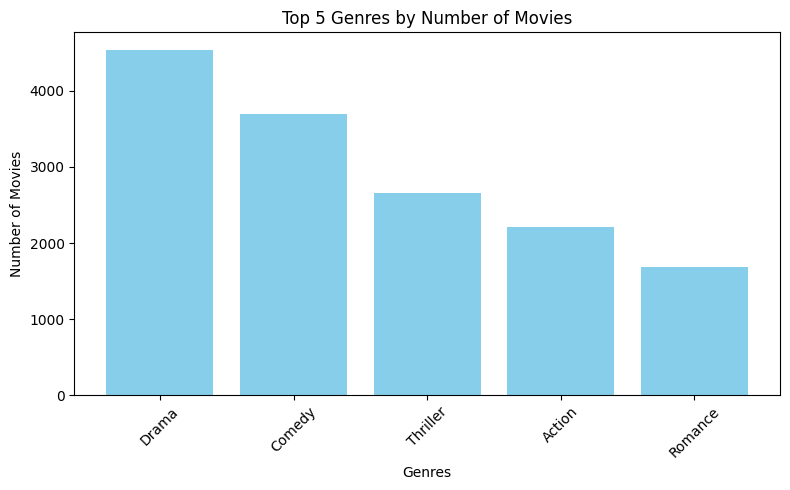

In [ ]:
# unique number of Genre
movie_cpy['genre']

# split values ',' and create a 2d list
list1 = []
for value in movie_cpy['genre']:
    list1.append(value.split(','))

# create a 1d list
one_d = []
for item in list1:
    for item1 in item:
        one_d.append(item1)

# find the unique values from listed_in
uni_list = []
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

print('Number of  genre are :', len(uni_list))

# find the amount of films each genre is in
from collections import Counter
number = Counter(one_d)

print('Top 5 Genres and the occurances are:')
number.most_common(5)
top_genres, counts = zip(*number.most_common(5))

# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(top_genres, counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top 5 Genres by Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Comedy and Drama are the Top two Genres which is around 4000

Least 5 Genres and their occurrences:
TV Movie: 133 movies
Western: 144 movies
Music: 289 movies
War: 313 movies
History: 475 movies


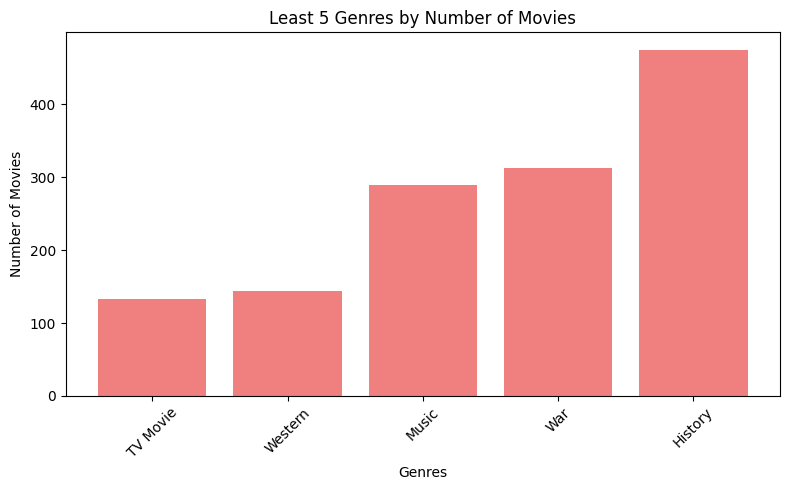

In [ ]:
print('Least 5 Genres and their occurrences:')
least_5_genres = number.most_common()[:-6:-1]  # Get the least common 5 genres
for genre, count in least_5_genres:
    print(f"{genre}: {count} movies")

# Extract data for plotting
least_genres, counts = zip(*least_5_genres)

# Plotting the bar graph for least common genres
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(least_genres, counts, color='lightcoral')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Least 5 Genres by Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

TV Movie and Western are least which around 150.

#Release Year

In [ ]:
from datetime import datetime
# Convert string to datetime object
movie_cpy['release_date'] = pd.to_datetime(movie_cpy['release_date'] )

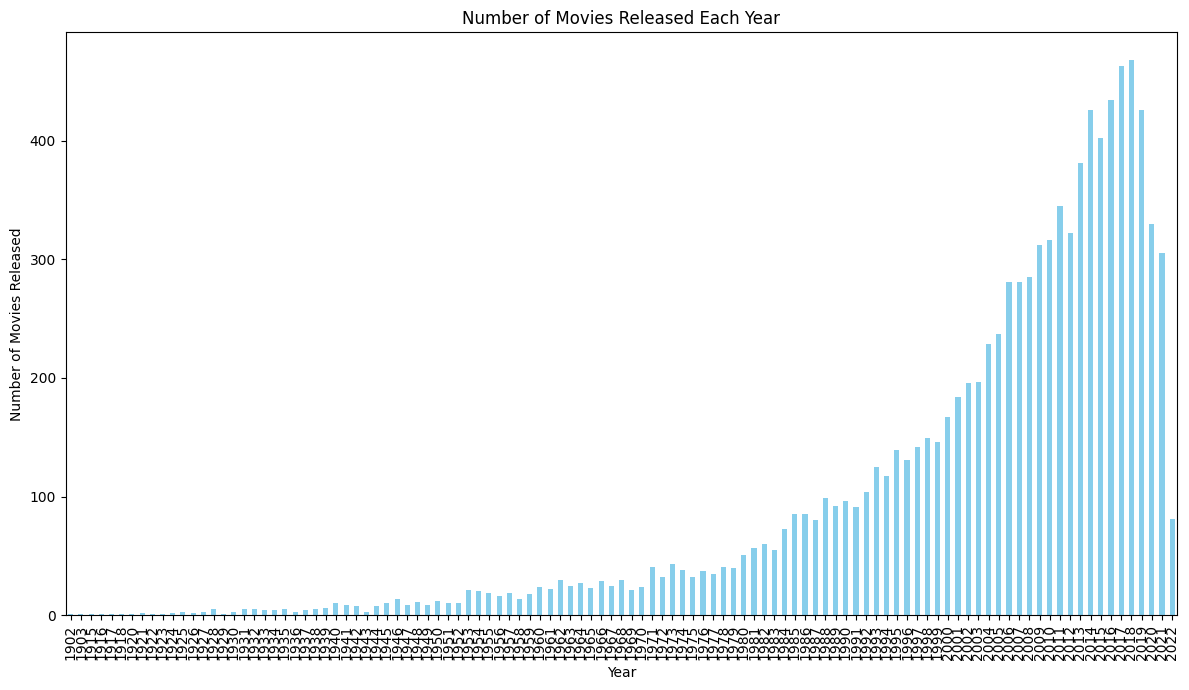

In [ ]:
# Group by year and count movies released each year
yearly_movie_counts = movie_cpy.groupby(movie_cpy['release_date'].dt.year)['title'].count()

# Plotting the count of movies released each year
plt.figure(figsize=(12, 7))
yearly_movie_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)

plt.tight_layout()

# Show plot
plt.show()

Number of Movies are increase year by year in most of the case but it had a Drop in the year around 2015.

#Top Popular Movies

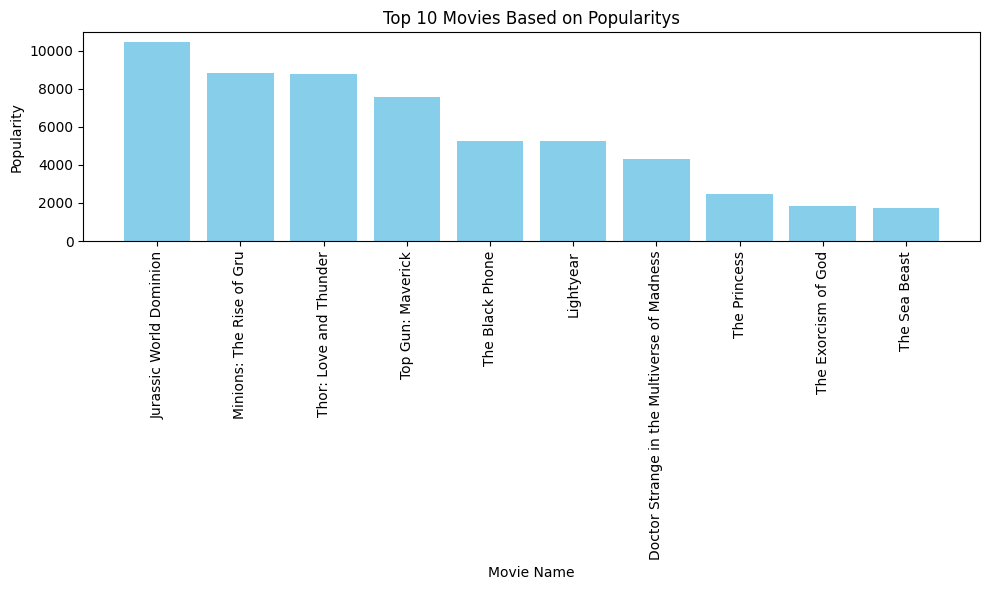

In [ ]:
sorted_df_desc = movie_cpy.sort_values(by='popularity', ascending=False)

# Sort DataFrame by Vote_Rating and get top 10 movies
top_10_movies = sorted_df_desc.nlargest(10, 'popularity')

# Plotting the top 10 movies based on vote ratings
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['title'], top_10_movies['popularity'], color='skyblue')
plt.xlabel('Movie Name')
plt.ylabel('Popularity')
plt.title('Top 10 Movies Based on Popularitys')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

Popular Movie is Jurassic World Dominion

#Destribution of Votes

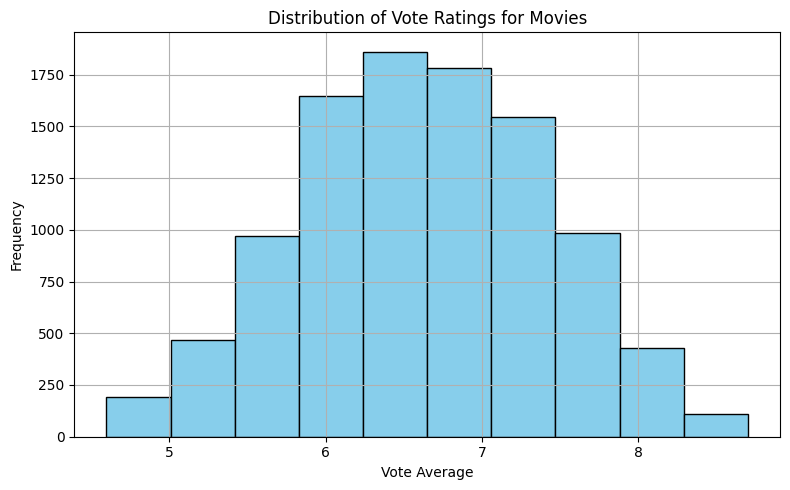

In [ ]:

# Plotting the distribution of vote ratings
plt.figure(figsize=(8, 5))
plt.hist(movie_cpy['vote_average'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Ratings for Movies')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Votes are uniformly Distributed.

## <font color='yellow' face='Cursive'>Recomandation Models</font>

#Recomandation Based on Different Parameter:

In [ ]:
# Display top recommended movies based on popularity
print("Top Recommended Movies Based on Popularity:")
top_10_movies['title'].head(10)

Top Recommended Movies Based on Popularity:


3066                        Jurassic World Dominion
1337                       Minions: The Rise of Gru
4522                         Thor: Love and Thunder
61                                Top Gun: Maverick
388                                 The Black Phone
1990                                      Lightyear
1313    Doctor Strange in the Multiverse of Madness
2815                                   The Princess
3103                            The Exorcism of God
948                                   The Sea Beast
Name: title, dtype: object

In [ ]:
# Display top recommended movies based on vote average
top_10_movies = sorted_df_desc.nlargest(10, 'vote_average')
print("Top Recommended Movies Based on Vote Average:")
top_10_movies['title'].head(10)

Top Recommended Movies Based on Vote Average:


0                          The Shawshank Redemption
2                                     The Godfather
1                       Dilwale Dulhania Le Jayenge
4                            The Godfather: Part II
3                                  Schindler's List
5                                 Impossible Things
9                                        Your Name.
18    The Lord of the Rings: The Return of the King
6                                     Spirited Away
15                                  The Dark Knight
Name: title, dtype: object

<font color = 'Brown'>This Approch is not suitable for recommate based on genre or movie overview.
Thus we are taking approch of NLP for recomandation</font>

#Recomandation Based on NLP:

In [ ]:
#Create the Dataframe
movie_dataset=movie_cpy[['id', 'title', 'overview', 'genre']]
#We are not Consider popularity or any other columns

In [ ]:
movie_dataset['tags'] = movie_dataset['overview']+movie_dataset['genre']
movie_dataset.head(10)

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
5,667257,Impossible Things,"Matilde is a woman who, after the death of her...","Family,Drama","Matilde is a woman who, after the death of her..."
6,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","Animation,Family,Fantasy","A young girl, Chihiro, becomes trapped in a st..."
7,730154,Your Eyes Tell,"A tragic accident lead to Kaori's blindness, b...","Romance,Drama","A tragic accident lead to Kaori's blindness, b..."
8,372754,Dou kyu sei – Classmates,"Rihito Sajo, an honor student with a perfect s...","Romance,Animation","Rihito Sajo, an honor student with a perfect s..."
9,372058,Your Name.,High schoolers Mitsuha and Taki are complete s...,"Romance,Animation,Drama",High schoolers Mitsuha and Taki are complete s...


In [ ]:
new_data  = movie_dataset.drop(columns=['overview', 'genre'])
new_data.head(10)

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
5,667257,Impossible Things,"Matilde is a woman who, after the death of her..."
6,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st..."
7,730154,Your Eyes Tell,"A tragic accident lead to Kaori's blindness, b..."
8,372754,Dou kyu sei – Classmates,"Rihito Sajo, an honor student with a perfect s..."
9,372058,Your Name.,High schoolers Mitsuha and Taki are complete s...


#By Using TfidVectorizer

In [ ]:
#import the library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
vector1 = TfidfVectorizer(stop_words='english')
vector1 = vector1.fit_transform(new_data["tags"].values.astype('U')).toarray()
vector1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#using linear kernnel
similarity1 = linear_kernel(vector1)
similarity1

array([[1.        , 0.00978028, 0.02126574, ..., 0.0427363 , 0.03229203,
        0.02024192],
       [0.00978028, 1.        , 0.00878729, ..., 0.        , 0.00234197,
        0.        ],
       [0.02126574, 0.00878729, 1.        , ..., 0.01099981, 0.01930892,
        0.01919596],
       ...,
       [0.0427363 , 0.        , 0.01099981, ..., 1.        , 0.00504767,
        0.00412701],
       [0.03229203, 0.00234197, 0.01930892, ..., 0.00504767, 1.        ,
        0.00687873],
       [0.02024192, 0.        , 0.01919596, ..., 0.00412701, 0.00687873,
        1.        ]])

In [ ]:
#Creating the recommendation function
def get_recommendation(title):
    inx = new_data[new_data["title"] == title].index[0]
    sim_distances = sorted(list(enumerate(similarity1[inx])), reverse = True, key = lambda x:x[1])
    for i in sim_distances[1:6]:
        print(new_data.iloc[i[0]].title)

In [ ]:
try:
    print("Recommendation:")
    get_recommendation("Spider-Man: Homecoming")
except:
    print('Movie Not Found')

Recommendation:
Spider-Man
Team Thor
Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2


This is the recomamdate movie which are releated to the given movie

#By Using CountVectorizer

In [ ]:
#import the library
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Setting Maximum Features and Stop Words
cv=CountVectorizer(max_features=10000, stop_words='english')

#Fitting and Transforming Data:
vector2=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [ ]:
#Importing cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Computing Cosine Similarity
similarity2=cosine_similarity(vector2)

In [ ]:
#Create recommand function
def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity2[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [ ]:
try:
    print("Recommandation:")
    recommand("Spider-Man: Homecoming")
except:
    print('Movie Not Found in the DataSet')

Recommandation:
Spider-Man: Homecoming
Spider-Man: Into the Spider-Verse
Team Thor
Spider-Man
Dead Man Down


#Conclusion:
We have perform an extensive Text Preprocessing/cleansing (NLP) on Movie Data. But this can also be used in Building Content-Based and Collaborative Filtering Based Recommendation Engines.